In [42]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('/Users/priyanshiagarwal/Downloads/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


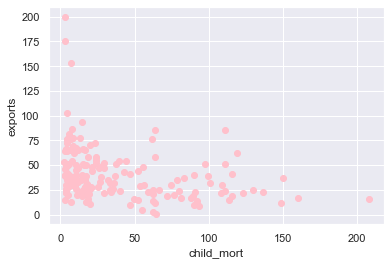

In [45]:
X = data[["child_mort","exports"]]
#Visualise data points
plt.scatter(X["child_mort"],X["exports"],c='pink')
plt.xlabel('child_mort')
plt.ylabel('exports')
plt.show()

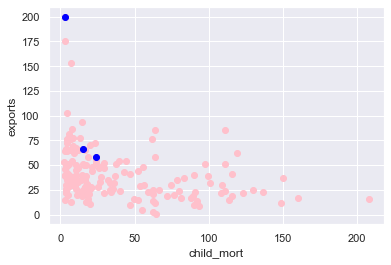

In [46]:
Centroids = (X.sample(n=K))
plt.scatter(X["child_mort"],X["exports"],c='pink')
plt.scatter(Centroids["child_mort"],Centroids["exports"],c='blue')
plt.xlabel('child_mort')
plt.ylabel('exports')
plt.show()

In [48]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["child_mort"]-row_d["child_mort"])**2
            d2=(row_c["exports"]-row_d["exports"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["exports","child_mort"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['exports'] - Centroids['exports']).sum() + (Centroids_new['child_mort'] - Centroids['child_mort']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["exports","child_mort"]]

/var/folders/s6/_7y2fb9s3ylcvyn20y5_lx800000gn/T/ipykernel_89460/3374839545.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
/var/folders/s6/_7y2fb9s3ylcvyn20y5_lx800000gn/T/ipykernel_89460/3374839545.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-3.631804713302163
15.487298523698527
11.299165040515033
1.9754743223443239
1.1628696302868828
0.7391059731613829
0.4475892503959962
1.0209759678177477
0.0


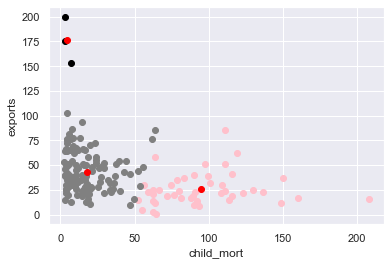

In [49]:
color=['pink','grey','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["child_mort"],data["exports"],c=color[k])
plt.scatter(Centroids["child_mort"],Centroids["exports"],c='red')
plt.xlabel('child_mort')
plt.ylabel('exports')
plt.show()